## 1. Introduction

Credit card fraud detection is a crucial task for financial institutions to minimize financial losses and protect their customers. Machine learning algorithms have proven to be effective tools for identifying fraudulent transactions due to their ability to learn complex patterns from large datasets. 

This project aims to develop a credit card fraud detection system using various machine learning algorithms:
- Decision Trees.
- Random Forest.
- Gradient Boosting Machine (GBM).
- XGBoost.
- Artificial Neural Networks (ANN).

The project will utilize a comprehensive dataset of credit card transactions, including both fraudulent and legitimate transactions. The data will be preprocessed to handle missing values, outliers, and categorical variables. Subsequently, the machine learning algorithms will be trained and evaluated on the preprocessed data. The performance of each algorithm will be assessed using various metrics, such as accuracy, precision, recall, and F1-score.

The project outcomes will provide insights into the effectiveness of different machine learning algorithms for credit card fraud detection. The findings can be used to guide the selection of appropriate algorithms for practical fraud detection systems

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
df = pd.read_csv('./creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Data Preprocessing

### Shape of Dataset

In [3]:
df.shape

(284807, 31)

### Information of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Missing Values

In [5]:
# Columns with missing values
missing_values = df.isnull().sum()
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### Drop Duplicates

In [6]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## 3. Exploratory Data Analysis

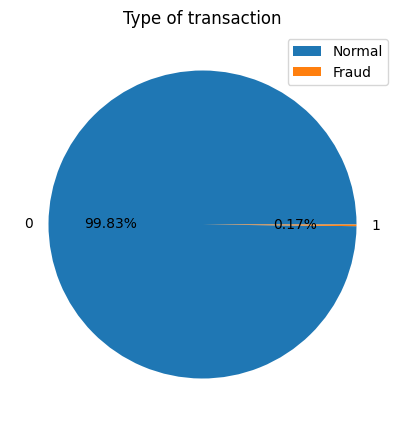

In [7]:
labels, counts = np.unique(df.Class, return_counts=True)

plt.figure(figsize=(5, 5))
plt.pie(counts, autopct='%1.2f%%', labels=labels)
plt.legend(['Normal', 'Fraud'])
plt.title('Type of transaction')

plt.show()

In [8]:
count= df['Class'].value_counts(normalize=False).sort_values()
prop = df['Class'].value_counts(normalize=True)
dist = pd.DataFrame({'Freq[N]':count,'Prop[%]':prop.round(4)})
dist

,Freq[N],Prop[%]
Class,,
0,284315,0.9983
1,492,0.0017


The highly imbalanced dataset (99.83% normal, 0.17% fraudulent transactions) poses significant challenges for fraud detection models. This imbalance can lead to biased predictions, poor performance on the minority class, and misleading evaluation metrics. Models trained on such data may struggle to learn fraud patterns effectively, potentially missing critical fraudulent activities.

Balancing the dataset is crucial to address these issues. It helps the model learn characteristics of both normal and fraudulent transactions equally, reducing bias and improving overall detection capabilities. Balanced data enables more meaningful model evaluation and aligns with the primary business objective of identifying fraud, even if it's rare. This approach leads to more robust and reliable fraud detection systems.


### Time and Amount Distribution

In [9]:
normal_time = df.loc[df['Class'] == 0]["Time"]
fraud_time = df.loc[df['Class'] == 1]["Time"]

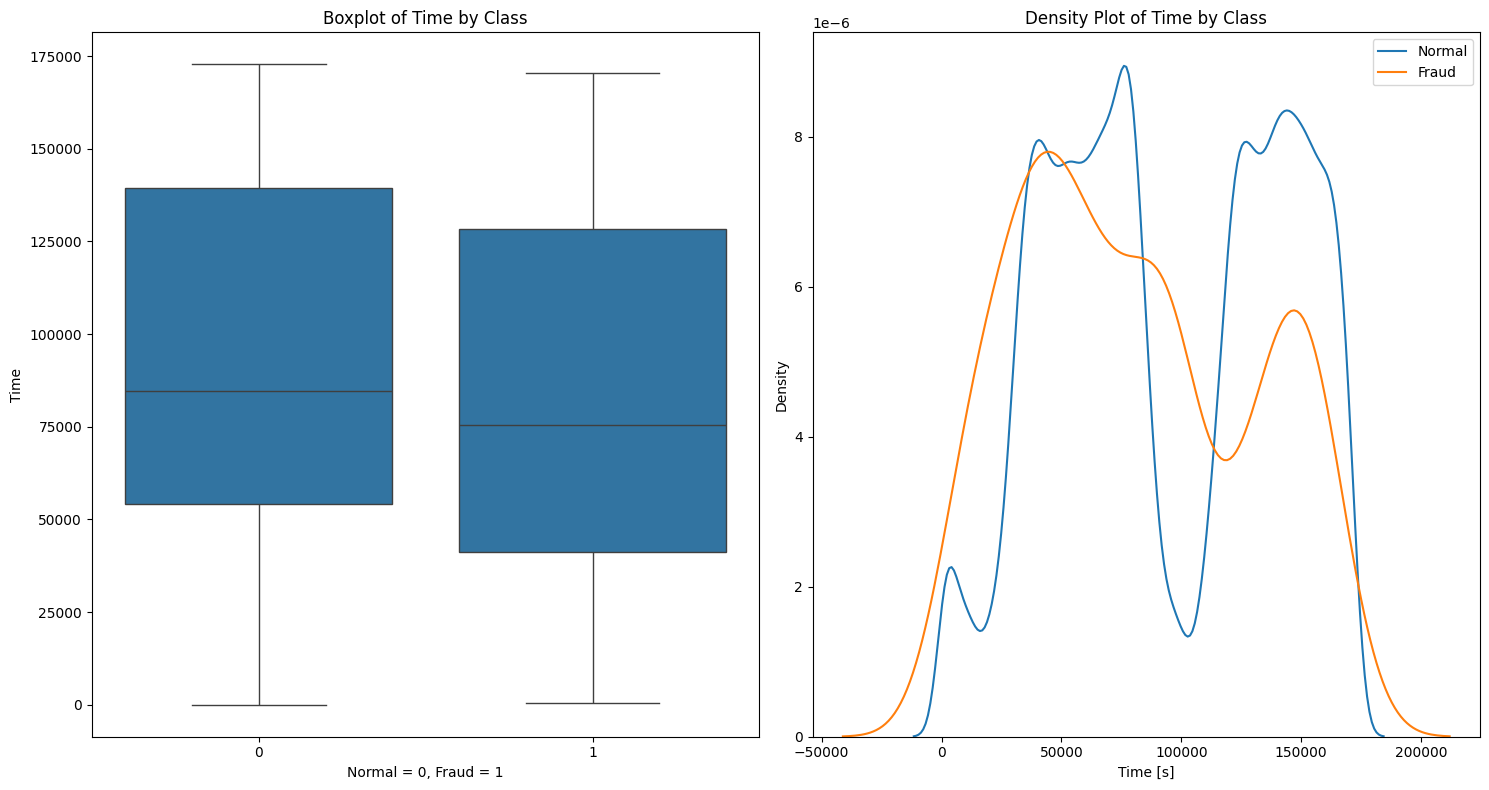

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

#Plot 1
sns.boxplot(x='Class', y='Time', data=df, ax=axs[0])
axs[0].set_title('Boxplot of Time by Class')
axs[0].set_xlabel('Normal = 0, Fraud = 1')
axs[0].set_ylabel('Time')

# Plot 2
sns.kdeplot(data=normal_time, ax=axs[1], label='Normal')
sns.kdeplot(data=fraud_time, ax=axs[1], label='Fraud')
axs[1].set_title('Density Plot of Time by Class')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Density')
axs[1].legend()

plt.tight_layout()
plt.show()

In [11]:
normal_amount = df.loc[df['Class'] == 0]['Amount']
fraud_amount = df.loc[df['Class'] == 1]['Amount']

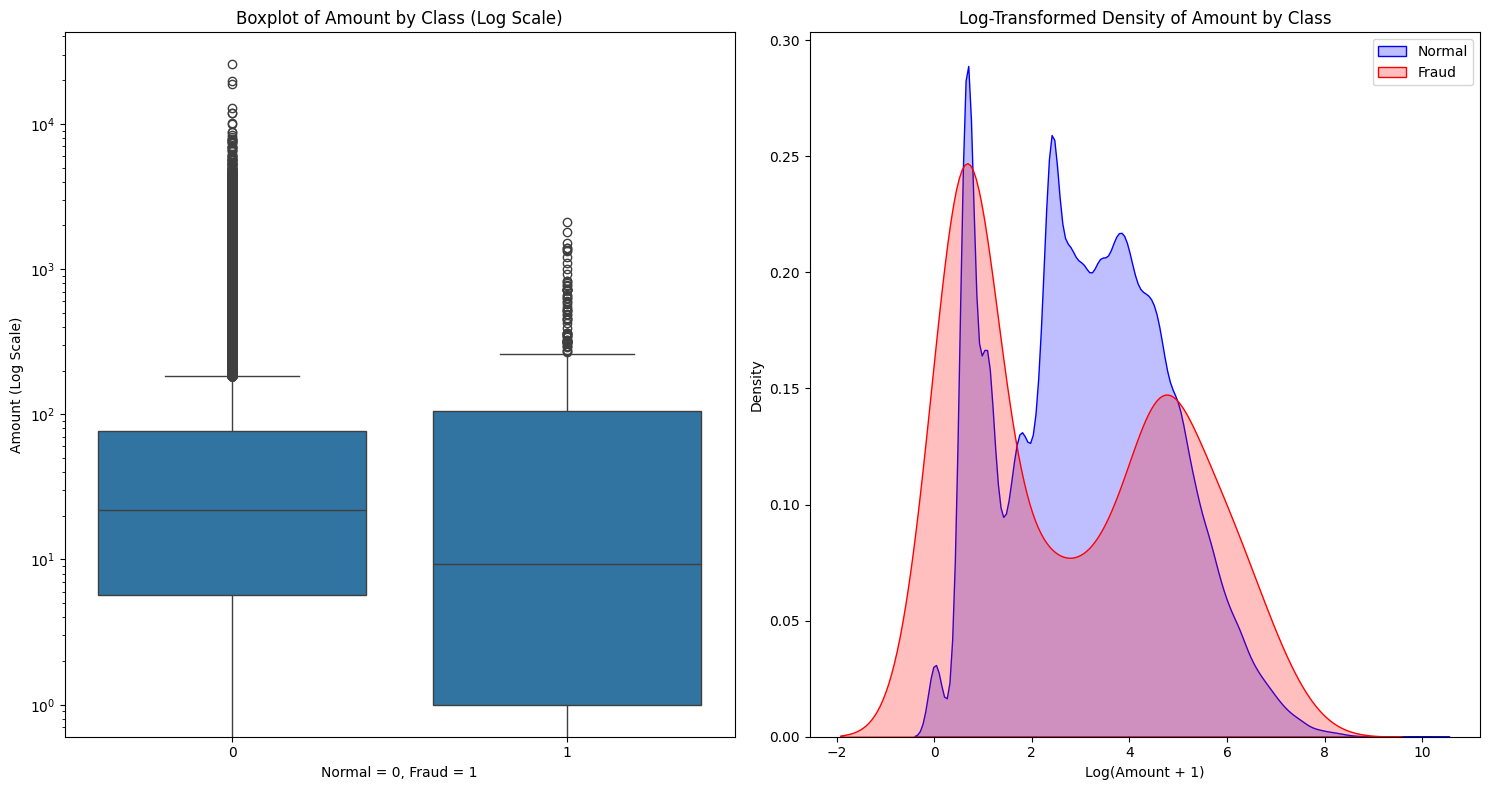

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot 1
sns.boxplot(x='Class', y='Amount', data=df, ax=axs[0])
axs[0].set_yscale('log')
axs[0].set_title('Boxplot of Amount by Class (Log Scale)')
axs[0].set_xlabel('Normal = 0, Fraud = 1')
axs[0].set_ylabel('Amount (Log Scale)')

# Plot 2
sns.kdeplot(data=np.log1p(normal_amount), ax=axs[1], label='Normal', fill=True, color='blue')
sns.kdeplot(data=np.log1p(fraud_amount), ax=axs[1], label='Fraud', fill=True, color='red')
axs[1].set_title('Log-Transformed Density of Amount by Class')
axs[1].set_xlabel('Log(Amount + 1)')
axs[1].set_ylabel('Density')
axs[1].legend()

plt.tight_layout()
plt.show()

Analyzing transaction time and amount alone did not yield significant insights for distinguishing fraudulent transactions from normal ones. The distribution of transaction times for both normal and fraudulent transactions appeared to be similar, indicating that fraudulent transactions were not concentrated at specific times. Similarly, the amount spent on both normal and fraudulent transactions exhibited overlapping distributions, suggesting that there was no clear spending threshold that could be used to identify fraudulent activity.

### Correlation Matrix

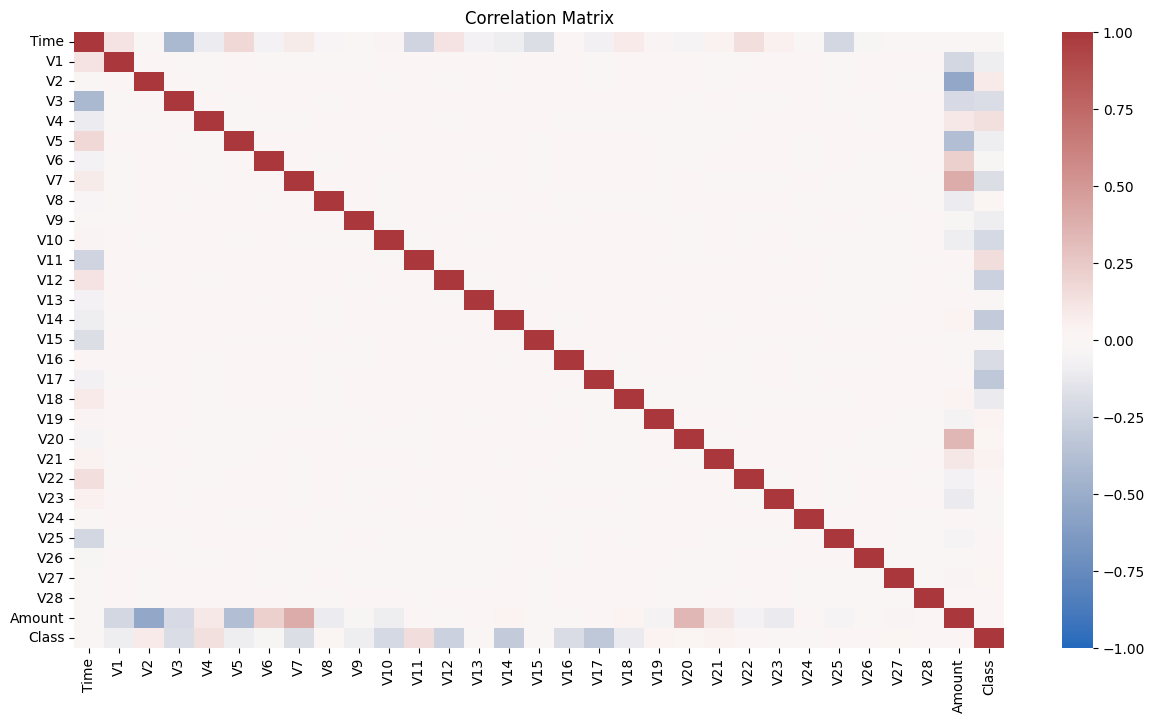

In [13]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=False, vmin=-1, vmax=1, cmap='vlag')
plt.title('Correlation Matrix')
plt.show()

In [14]:
top_correlations = pd.concat([correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(6),
                              correlation_matrix.unstack().sort_values(ascending=True).drop_duplicates().head(5)])
top_correlations

Time    Time      1.000000
Amount  V7        0.397311
V20     Amount    0.339403
Amount  V6        0.215981
V5      Time      0.173072
V11     Class     0.154876
V2      Amount   -0.531409
V3      Time     -0.419618
V5      Amount   -0.386356
V17     Class    -0.326481
Class   V14      -0.302544
dtype: float64

## 4. Data Preparation

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Standard Scaler

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

### SMOTE

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_normalized, y_train)


In [18]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(398016, 30)
(398016,)


## 5. Modeling Algorithms

The following modeling algorithms will be used for the fraud detection:

- Decision Tree
- Random Forest
- Gradient Boosting
- XGB
- Artificial Neural Network

### Import Libraries

In [19]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


### 5.1 Decision Tree

In [20]:
# Randomized Search Parameters
param_dist_dt = {
    'max_depth': [5, 10, 20, 30],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

# Randomized Search
random_search_dt = RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                                      param_distributions=param_dist_dt,
                                      n_iter=10,
                                      scoring='accuracy',
                                      cv=5,
                                      verbose=0,
                                      n_jobs=-1,
                                      random_state=42)

random_search_dt.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 20, 30],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy')

In [21]:
#Best Parameters for Decision Tree
best_dt = random_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test_normalized)

test_accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Results
print(f'Best parameters found: {random_search_dt.best_params_}')
print(f'Best cross-validation accuracy: {random_search_dt.best_score_:.4f}')
print(f'Test set accuracy: {test_accuracy_dt:.4f}\n')

Best parameters found: {'min_samples_split': 2, 'max_depth': 30, 'criterion': 'entropy'}
Best cross-validation accuracy: 0.9984
Test set accuracy: 0.9976



### 5.2 Random Forest

In [22]:
# Randomized Search Parameters
param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 30],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                      param_distributions=param_dist_rf,
                                      n_iter=10,
                                      scoring='accuracy',
                                      cv=5,
                                      verbose=0,
                                      n_jobs=-1,
                                      random_state=42)

random_search_rf.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [23]:
#Best Parameters for Random Forest
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_normalized)

test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Results
print(f'Best parameters found: {random_search_rf.best_params_}')
print(f'Best cross-validation accuracy: {random_search_rf.best_score_:.4f}')
print(f'Test set accuracy: {test_accuracy_rf:.4f}\n')

Best parameters found: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'entropy'}
Best cross-validation accuracy: 0.9999
Test set accuracy: 0.9995



### 5.3 Gradient Boosting

In [24]:
# Randomized Search Parameters

param_dist_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Randomized Search
random_search_gb = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=param_dist_gb,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=0,
    n_jobs=-1
)

random_search_gb.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 4/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50, subsample=1.0;, score=0.964 total time= 5.1min
[CV 2/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50, subsample=1.0;, score=0.964 total time= 5.2min
[CV 1/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50, subsample=1.0;, score=0.965 total time= 5.2min
[CV 3/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50, subsample=1.0;, score=0.964 total time= 5.4min
[CV 5/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50, subsample=1.0;, score=0.963 total time= 5.4min
[CV 3/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, subsample=0.8;, score=0.981 total time= 8.4min
[CV 1/5] END learning_rate=0.1, m

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='accuracy', verbose=3)

In [25]:
# Getting the best model and making predictions
best_gb = random_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test_normalized)

test_accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Printing results
print(f'Best parameters found: {random_search_gb.best_params_}')
print(f'Best cross-validation accuracy: {random_search_gb.best_score_:.4f}')
print(f'Test set accuracy: {test_accuracy_gb:.4f}\n')

Best parameters found: {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 4, 'learning_rate': 0.2}
Best cross-validation accuracy: 0.9993
Test set accuracy: 0.9986



### 5.4 XGB

In [26]:
param_distributions_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.1, 1, 5]
}

random_search_xgb = RandomizedSearchCV(estimator=XGBClassifier(),
                                       param_distributions=param_distributions_xgb,
                                       scoring='accuracy',
                                       cv=5,
                                       verbose=0,
                                       n_jobs=-1,
                                       n_iter=10,
                                       random_state=42)

random_search_xgb.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [0.1, 1, 5],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy')

In [27]:
# Best parameters for XGB
best_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_normalized)

test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Results
print(f'Best parameters found: {random_search_xgb.best_params_}')
print(f'Best cross-validation accuracy: {random_search_xgb.best_score_:.4f}')
print(f'Test set accuracy: {test_accuracy_xgb:.4f}\n')

Best parameters found: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.9}
Best cross-validation accuracy: 0.9979
Test set accuracy: 0.9965



### 5.5 Artificial Neural Network

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2024-07-16 12:57:39.014012: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-16 12:57:39.132575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-16 12:57:39.188152: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-16 12:57:39.188498: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-16 12:57:39.279791: I tensorflow/core/platform/cpu_feature_gua

In [29]:
model_ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_ann.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Model Summary
model_ann.summary()

# Model Train
history = model_ann.fit(X_train_resampled, y_train_resampled,
                        epochs=50, batch_size=64, verbose=0,
                        validation_data=(X_test_normalized, y_test))

2024-07-16 12:57:40.829654: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-16 12:57:40.947174: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
y_pred_ann = model_ann.predict(X_test_normalized).flatten()
y_pred_ann_int = y_pred_ann.astype(np.int64)


test_accuracy_ann = accuracy_score(y_test, y_pred_ann_int)
print(f'Test set accuracy: {test_accuracy_ann:.4f}\n')

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step
Test set accuracy: 0.9987



## 6. Model Evaluation

### Test accuracy evaluation

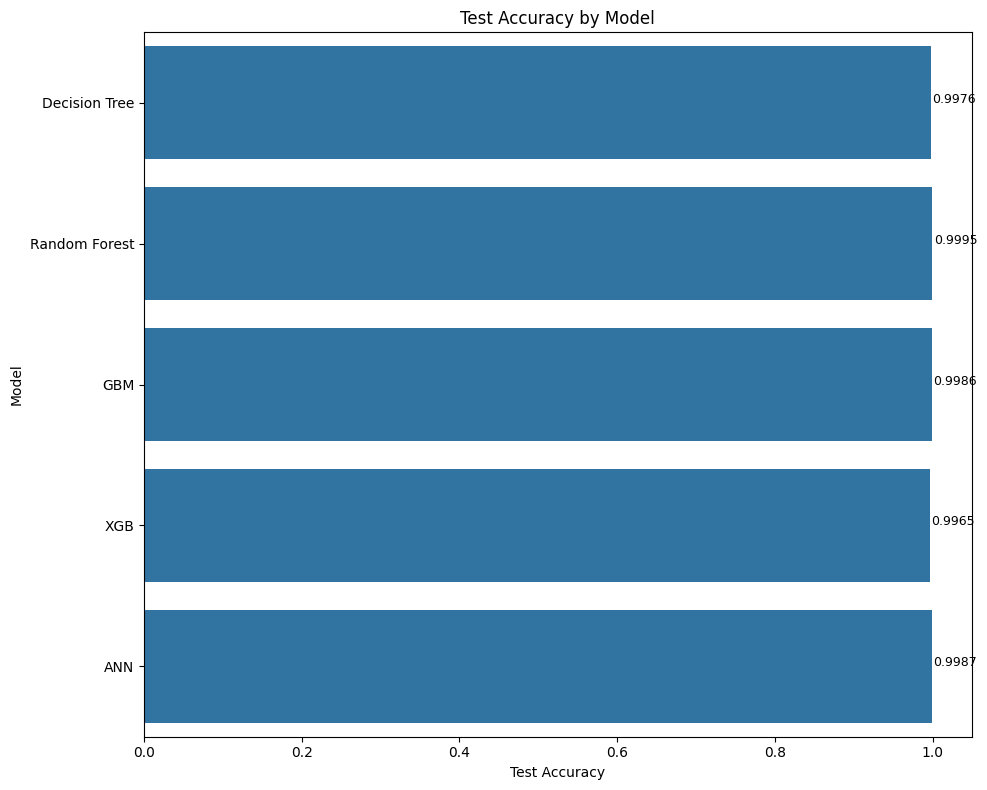

In [31]:
models_names = ['Decision Tree', 'Random Forest', 'GBM', 'XGB', 'ANN']
test_accuracies = [test_accuracy_dt, test_accuracy_rf, test_accuracy_gb, test_accuracy_xgb, test_accuracy_ann]

results_df = pd.DataFrame({'Model': models_names, 'Test Accuracy': test_accuracies})

plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Test Accuracy', y='Model', data=results_df)
plt.title('Test Accuracy by Model')
plt.xlabel('Test Accuracy')
plt.ylabel('Model')

for index, row in results_df.iterrows():
    barplot.text(row['Test Accuracy'] + 0.002, index, f'{row["Test Accuracy"]:.4f}', color='black', ha="left", fontsize=9)

plt.tight_layout()
plt.show()

### Confusion Matrix

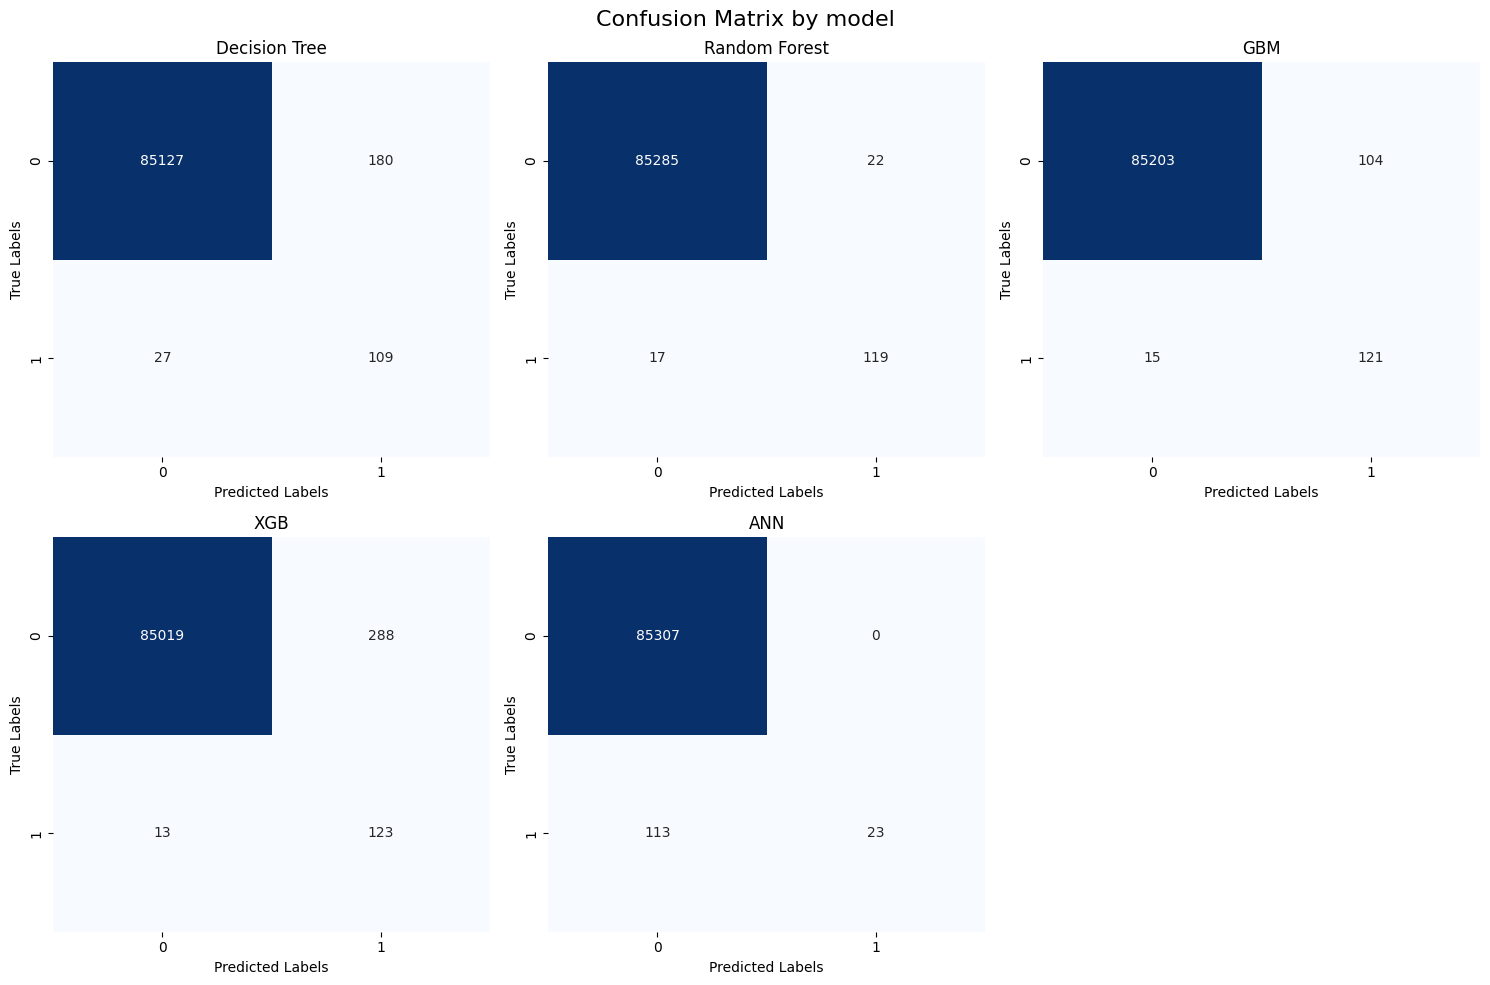

In [35]:
from sklearn.metrics import confusion_matrix

#Confusion Matrix for each model
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_gb = confusion_matrix(y_test, y_pred_gb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_ann = confusion_matrix(y_test, y_pred_ann_int)

# List of cms
cms = [cm_dt, cm_rf, cm_gb, cm_xgb, cm_ann]


# Plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
plt.suptitle('Confusion Matrix by model', fontsize=16)
for ax, cm, model_name in zip(axes.flatten(), cms, models_names):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted Labels', fontsize=10)
    ax.set_ylabel('True Labels', fontsize=10)
    ax.set_xticklabels(['0', '1'])
    ax.set_yticklabels(['0', '1'], va='center')

fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()


### Metrics

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Models and predictions
model_preds = {
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'GBM': y_pred_gb,
    'XGB': y_pred_xgb,
    'ANN': y_pred_ann_int
}

# Metrics
metrics = {
    'Accuracy': [],
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

for model_name, y_pred in model_preds.items():
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1-score'].append(f1_score(y_test, y_pred))

# Metrics Dataframe
metrics_df = pd.DataFrame(metrics)

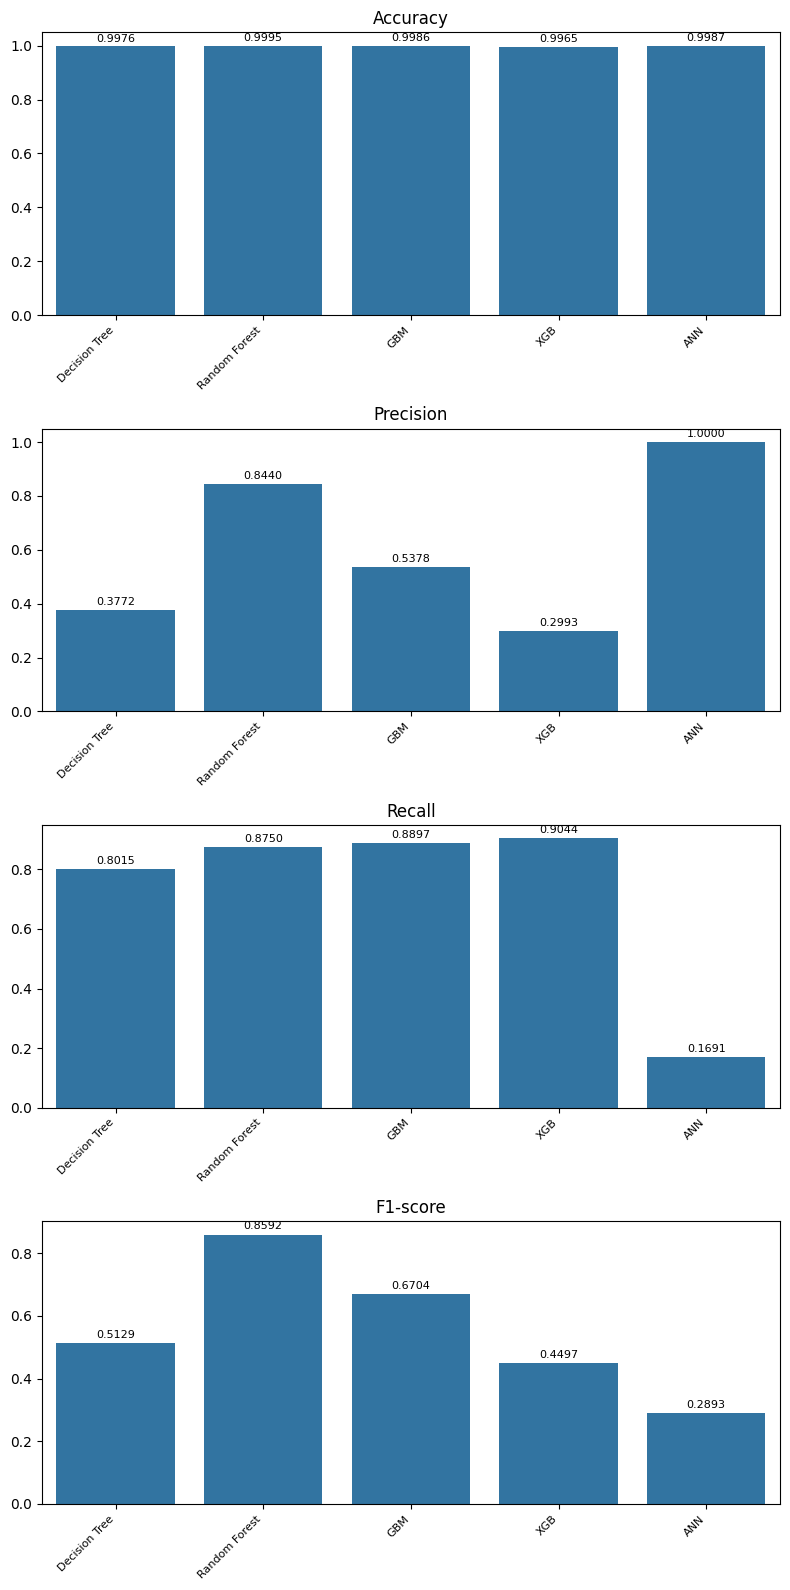

In [49]:
plt.figure(figsize=(8, 16))  # Aumentar el tamaño de la figura para acomodar 4 subplots

# Accuracy
plt.subplot(4, 1, 1)  # Cambiar a 4 filas y 1 columna
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylabel('')
plt.xlabel('')
for idx, value in enumerate(metrics_df['Accuracy']):
    plt.text(idx, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=8)

# Precision
plt.subplot(4, 1, 2)  # Cambiar a 4 filas y 1 columna
sns.barplot(x='Model', y='Precision', data=metrics_df)
plt.title('Precision')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylabel('')
plt.xlabel('')
for idx, value in enumerate(metrics_df['Precision']):
    plt.text(idx, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=8)

# Recall
plt.subplot(4, 1, 3)  # Cambiar a 4 filas y 1 columna
sns.barplot(x='Model', y='Recall', data=metrics_df)
plt.title('Recall')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylabel('')
plt.xlabel('')
for idx, value in enumerate(metrics_df['Recall']):
    plt.text(idx, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=8)

# F1-score
plt.subplot(4, 1, 4)  # Cambiar a 4 filas y 1 columna
sns.barplot(x='Model', y='F1-score', data=metrics_df)
plt.title('F1-score')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylabel('')
plt.xlabel('')
for idx, value in enumerate(metrics_df['F1-score']):
    plt.text(idx, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## Conclusion

Among the models evaluated, the Random Forest model stands out as the best overall performer. It achieves a high balance between key metrics: precision (0.8439), recall (0.8750), and F1-score (0.8592), coupled with an exceptionally high accuracy (0.9995). This balance indicates that the Random Forest model not only makes accurate predictions but also minimizes both false positives and false negatives effectively.

Other models, while showing high accuracy, have significant drawbacks. For instance, the XGB model has the highest recall (0.9044), meaning it captures almost all true positives, but its low precision (0.2992) indicates a high number of false positives, leading to a lower F1-score (0.4497). Similarly, the ANN model has perfect precision (1.0000), meaning all its positive predictions are correct, but it has a very low recall (0.1691), missing a large number of true positives, resulting in a low F1-score (0.2893).

The GBM and Decision Tree models show good recall but suffer from moderate to low precision, leading to many false positives. Their F1-scores reflect this imbalance, making them less reliable than Random Forest.

In summary, the Random Forest model's superior balance across all metrics and its exceptional accuracy make it the most effective and robust model in this analysis, outperforming others in providing reliable and accurate predictions.